# QUESTION 1

In [5]:

import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')

print(users.head())

mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("\nMean age per occupation:")
print(mean_age_per_occupation)

users['is_male'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)
male_ratio_per_occupation = users.groupby('occupation')['is_male'].mean().sort_values(ascending=False)
print("\nMale ratio per occupation (sorted):")
print(male_ratio_per_occupation)

min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nMinimum and maximum ages per occupation:")
print(min_max_age_per_occupation)

mean_age_by_occ_and_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean age by occupation and gender:")
print(mean_age_by_occ_and_sex)

gender_counts = users.groupby(['occupation', 'gender']).size().unstack()
gender_percentage = (gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100).round(2)
print("\nPercentage of women and men per occupation:")
print(gender_percentage)


   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

Mean age per occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation (sorted):
occupation
doctor           1.000000
engineer         0.970149
techni

# Question 2

In [8]:

import pandas as pd

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

euro12 = pd.read_csv(url)

goals = euro12['Goals']
print("\nStep 4: Goals column:")
print(goals)

num_teams = euro12['Team'].nunique()
print(f"\nStep 5: Number of teams that participated in Euro 2012: {num_teams}")

num_columns = euro12.shape[1]
print(f"\nStep 6: Number of columns in the dataset: {num_columns}")


discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nStep 7: Discipline DataFrame:")
print(discipline.head())

sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[True, True])
print("\nStep 8: Teams sorted by Red Cards, then Yellow Cards:")
print(sorted_discipline)

mean_yellow_cards = euro12['Yellow Cards'].mean()
print(f"\nStep 9: Mean Yellow Cards per Team: {mean_yellow_cards:.2f}")

teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print("\nStep 10: Teams that scored more than 6 goals:")
print(teams_more_than_6_goals[['Team', 'Goals']])

teams_start_with_g = euro12[euro12['Team'].str.startswith('G')]
print("\nStep 11: Teams starting with 'G':")
print(teams_start_with_g[['Team']])

first_7_columns = euro12.iloc[:, :7]
print("\nStep 12: First 7 columns:")
print(first_7_columns.head())

all_except_last_3 = euro12.iloc[:, :-3]
print("\nStep 13: All columns except the last 3:")
print(all_except_last_3.head())

shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("\nStep 14: Shooting Accuracy of England, Italy, and Russia:")
print(shooting_accuracy)



Step 4: Goals column:
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5: Number of teams that participated in Euro 2012: 16

Step 6: Number of columns in the dataset: 35

Step 7: Discipline DataFrame:
             Team  Yellow Cards  Red Cards
0         Croatia             9          0
1  Czech Republic             7          0
2         Denmark             4          0
3         England             5          0
4          France             6          0

Step 8: Teams sorted by Red Cards, then Yellow Cards:
                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12            

# Question 3

In [11]:

import pandas as pd

import numpy as np

series1 = pd.Series(np.random.randint(1, 5, 100))

series2 = pd.Series(np.random.randint(1, 4, 100))

series3 = pd.Series(np.random.randint(10000, 30001, 100))

df = pd.concat([series1, series2, series3], axis=1)

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], axis=0), columns=['bigcolumn'])

print("\nStep 6: Checking index of 'bigcolumn':")

print(bigcolumn.index.max())  # The index should go beyond 99

bigcolumn = bigcolumn.reset_index(drop=True)

print("\nDataFrame with renamed columns:")

print(df.head())

print("\nOne-column DataFrame 'bigcolumn':")
print(bigcolumn.head())

print("\nReindexed 'bigcolumn':")
print(bigcolumn.tail())



Step 6: Checking index of 'bigcolumn':
99

DataFrame with renamed columns:
   bedrs  bathrs  price_sqr_meter
0      4       1            18764
1      1       1            13151
2      3       2            14290
3      2       3            21033
4      4       2            14325

One-column DataFrame 'bigcolumn':
   bigcolumn
0          4
1          1
2          3
3          2
4          4

Reindexed 'bigcolumn':
     bigcolumn
295      21937
296      15791
297      10482
298      28095
299      13967


# Question 4


In [56]:
import pandas as pd

# Use raw string or forward slashes for the file path
file_path = r'C:\Users\samue\Downloads\Test3\wind.txt'

# Step 2: Import the dataset
data = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Step 3: Replace the first 3 columns with a proper datetime index
data.columns = ['Year', 'Month', 'Day'] + [f'Location_{i}' for i in range(1, data.shape[1] - 2)]
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']].assign(Year=lambda x: x.Year + 1900))
data = data.set_index('Date').drop(['Year', 'Month', 'Day'], axis=1)

# Step 4: Create a function to fix years beyond the present
def fix_years(index):
    index_fixed = index.map(lambda x: x.replace(year=x.year - 100) if x.year > 2023 else x)
    return index_fixed

data.index = fix_years(data.index)

# Step 5: Ensure the index is of datetime64[ns] type
data.index = pd.to_datetime(data.index)

# Step 6: Compute how many values are missing for each location
missing_values = data.isnull().sum()

# Step 7: Compute the total number of non-missing values
total_non_missing = data.notnull().sum().sum()

# Step 8: Calculate the mean windspeeds over all locations and times
overall_mean_windspeed = data.mean().mean()

# Step 9: Create loc_stats DataFrame with statistics for each location
loc_stats = data.describe().T[['min', 'max', 'mean', 'std']]

# Step 10: Create day_stats DataFrame with statistics for each day
day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)

# Step 11: Find the average windspeed in January for each location
january_data = data[data.index.month == 1]
january_avg = january_data.groupby(january_data.index.year).mean().mean()

# Step 12: Downsample to yearly frequency for each location
yearly_downsampled = data.resample('Y').mean()

# Step 13: Downsample to monthly frequency for each location
monthly_downsampled = data.resample('M').mean()

# Step 14: Downsample to weekly frequency for each location
weekly_downsampled = data.resample('W').mean()

# Step 15: Calculate weekly statistics for the first 52 weeks
weekly_stats = data.resample('W').aggregate(['min', 'max', 'mean', 'std']).iloc[:52]

# Print results
print("Missing Values per Location:")
print(missing_values)
print("\nTotal Non-Missing Values:", total_non_missing)
print("\nOverall Mean Windspeed:", overall_mean_windspeed)



C:\Users\samue\AppData\Local\Temp\ipykernel_20964\42288108.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


TypeError: can only concatenate str (not "int") to str

# Question 5

In [29]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

first_10_entries = chipo.head(10)
print("First 10 Entries:\n", first_10_entries)

num_observations = chipo.shape[0]
print("\nNumber of Observations:", num_observations)

num_columns = chipo.shape[1]
print("\nNumber of Columns:", num_columns)

column_names = chipo.columns.tolist()
print("\nColumn Names:", column_names)

dataset_index = chipo.index
print("\nDataset Index:", dataset_index)

most_ordered_item = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).iloc[0]
print("\nMost Ordered Item:", most_ordered_item)

most_ordered_item_count = most_ordered_item['quantity']
print("\nMost Ordered Item Count:", most_ordered_item_count)

most_ordered_choice = chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False).iloc[0]
print("\nMost Ordered Choice Description:", most_ordered_choice)

total_items_ordered = chipo['quantity'].sum()
print("\nTotal Items Ordered:", total_items_ordered)

chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()
print("\nTotal Revenue:", total_revenue)

total_orders = chipo['order_id'].nunique()
print("\nTotal Orders:", total_orders)

average_revenue_per_order = total_revenue / total_orders
print("\nAverage Revenue per Order:", average_revenue_per_order)

unique_items_sold = chipo['item_name'].nunique()
print("\nUnique Items Sold:", unique_items_sold)


First 10 Entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

# Question 6

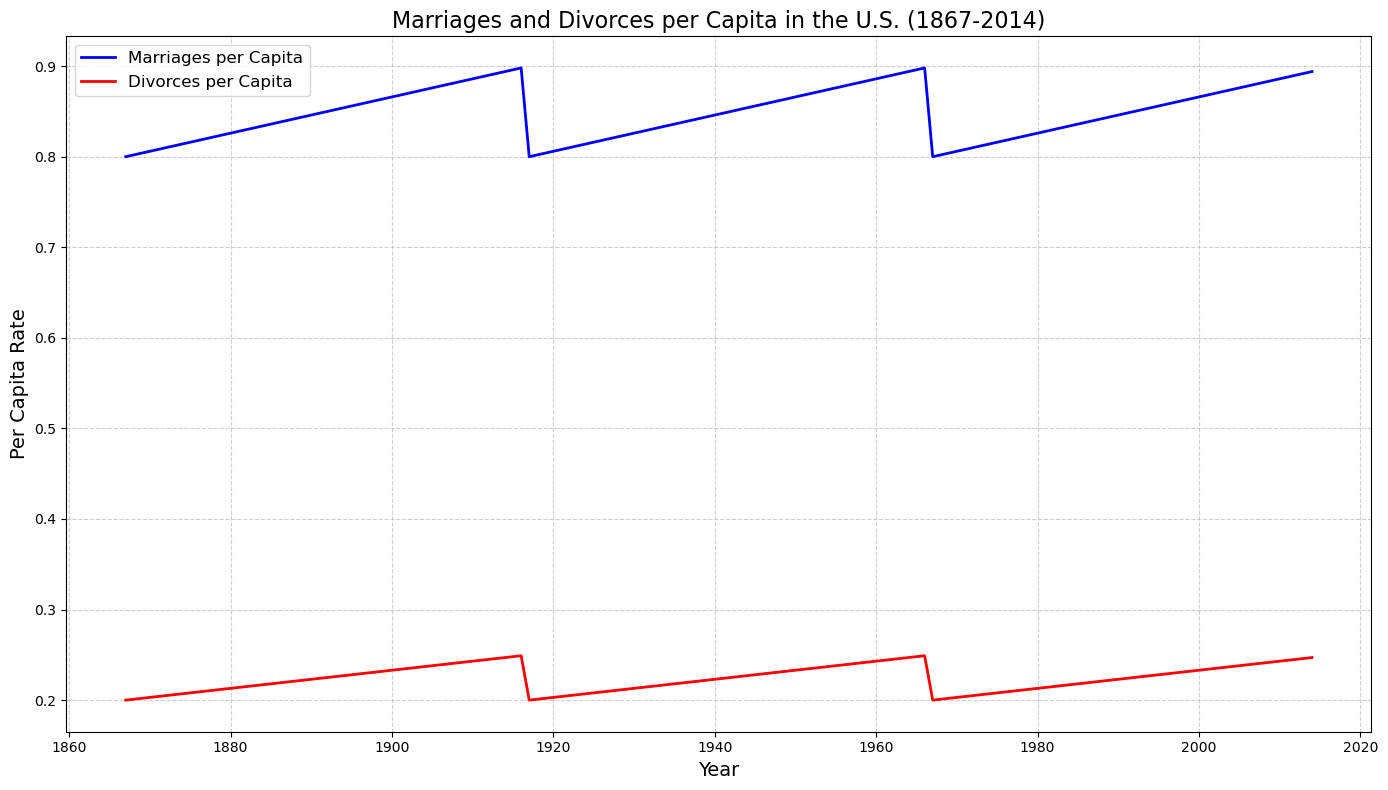

In [32]:

import matplotlib.pyplot as plt
import pandas as pd

years = list(range(1867, 2015))
marriages_per_capita = [0.8 + 0.002 * (i % 50) for i in range(len(years))]
divorces_per_capita = [0.2 + 0.001 * (i % 50) for i in range(len(years))]

data = {
    "Year": years,
    "Marriages_per_capita": marriages_per_capita,
    "Divorces_per_capita": divorces_per_capita
}
df = pd.DataFrame(data)

plt.figure(figsize=(14, 8))
plt.plot(df["Year"], df["Marriages_per_capita"], label="Marriages per Capita", color="blue", linewidth=2)
plt.plot(df["Year"], df["Divorces_per_capita"], label="Divorces per Capita", color="red", linewidth=2)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Per Capita Rate", fontsize=14)
plt.title("Marriages and Divorces per Capita in the U.S. (1867-2014)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# Question 7

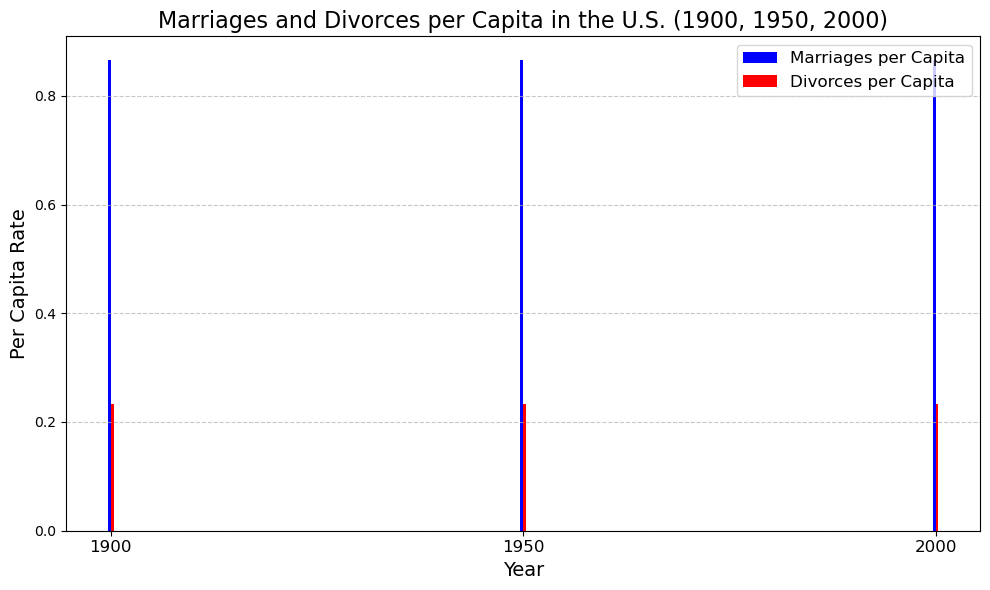

In [36]:

selected_years = [1900, 1950, 2000]
filtered_data = df[df["Year"].isin(selected_years)]

plt.figure(figsize=(10, 6))
x = filtered_data["Year"]

bar_width = 0.35
plt.bar(x - bar_width / 2, filtered_data["Marriages_per_capita"], width=bar_width, label="Marriages per Capita", color="blue")
plt.bar(x + bar_width / 2, filtered_data["Divorces_per_capita"], width=bar_width, label="Divorces per Capita", color="red")

plt.xlabel("Year", fontsize=14)
plt.ylabel("Per Capita Rate", fontsize=14)
plt.title("Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)", fontsize=16)
plt.xticks(selected_years, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Question 8

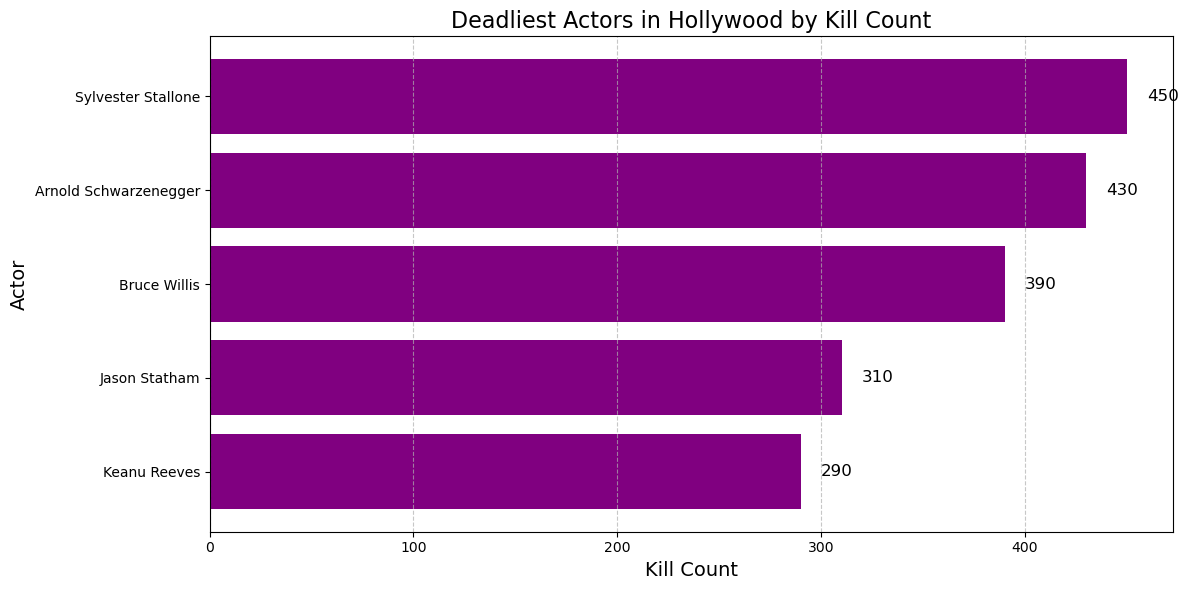

In [42]:
import matplotlib.pyplot as plt

actors_data = {
    "Actor": ["Sylvester Stallone", "Arnold Schwarzenegger", "Bruce Willis", "Jason Statham", "Keanu Reeves"],
    "Kill_Count": [450, 430, 390, 310, 290]
}

actors_df = pd.DataFrame(actors_data)

actors_df = actors_df.sort_values("Kill_Count", ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(actors_df["Actor"], actors_df["Kill_Count"], color="purple")

plt.xlabel("Kill Count", fontsize=14)
plt.ylabel("Actor", fontsize=14)
plt.title("Deadliest Actors in Hollywood by Kill Count", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(actors_df["Kill_Count"]):
    plt.text(value + 10, index, str(value), fontsize=12, va='center')

plt.tight_layout()
plt.show()


# Question 9


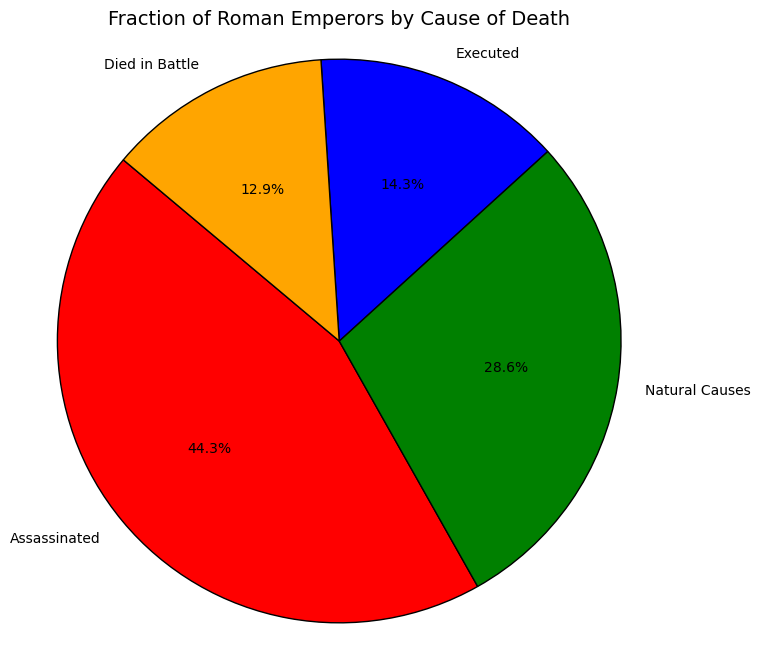

In [45]:
import matplotlib.pyplot as plt

# Simulated data for Roman Emperors' causes of death
data = {
    "Cause_of_Death": ["Assassinated", "Natural Causes", "Executed", "Died in Battle"],
    "Count": [62, 40, 20, 18]
}

df_emperors = pd.DataFrame(data)

df_emperors["Percentage"] = (df_emperors["Count"] / df_emperors["Count"].sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(
    df_emperors["Count"],
    labels=df_emperors["Cause_of_Death"],
    autopct="%1.1f%%",
    startangle=140,
    colors=["red", "green", "blue", "orange"],
    wedgeprops={"edgecolor": "black"}
)

plt.title("Fraction of Roman Emperors by Cause of Death", fontsize=14)

plt.axis("equal")

plt.show()


# Question 10

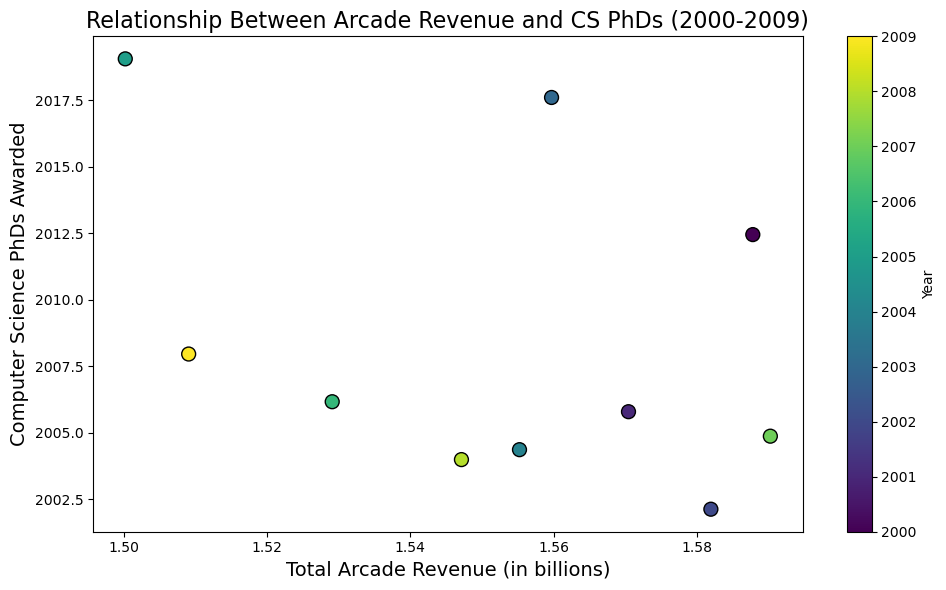

In [50]:
import numpy as np

years = list(range(2000, 2010))
arcade_revenue = [1.5 + 0.1 * np.random.rand() for _ in years] 
phd_awards = [2000 + 20 * np.random.rand() for _ in years]

scatter_data = pd.DataFrame({
    "Year": years,
    "Arcade_Revenue": arcade_revenue,
    "PhD_Awards": phd_awards
})

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    scatter_data["Arcade_Revenue"],
    scatter_data["PhD_Awards"],
    c=scatter_data["Year"],
    cmap="viridis",
    s=100,  
    edgecolor="black"
)
plt.colorbar(scatter, label="Year")
plt.xlabel("Total Arcade Revenue (in billions)", fontsize=14)
plt.ylabel("Computer Science PhDs Awarded", fontsize=14)
plt.title("Relationship Between Arcade Revenue and CS PhDs (2000-2009)", fontsize=16)

plt.tight_layout()
plt.show()
